In [62]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

In [3]:
catchments = gpd.read_file("data/catchments_parameters_landuse.gpkg")
catchments

,grdc_no,river,station,area,altitude,lat_org,long_org,lat_pp,long_pp,dist_km,...,ndvi_w,iota,theta,R2,agriculture,forests,infrastructure,wetlands,water,geometry
0,6321100.0,NIERS,GOCH,1203.0,12.02,51.6840,6.1510,51.68417,6.15083,0.0,...,0.878906,4.503174,4.229736,0.856343,0.685409,0.090451,0.217199,0.000000,0.006941,"MULTIPOLYGON (((6.2588 51.7171, 6.2588 51.7179..."
1,6321200.0,ROER,STAH,2105.0,32.45,51.0976,6.1042,51.09750,6.10417,0.0,...,0.643311,6.797791,8.988190,0.667515,0.473625,0.331916,0.182036,0.004035,0.008389,"MULTIPOLYGON (((6.0396 50.7721, 6.0388 50.7721..."
2,6334270.0,SOHOLMER AU,SOHOLM,352.0,1.70,54.6997,9.0228,54.70000,9.02250,0.0,...,0.506607,5.789795,10.272217,0.872571,0.851289,0.089576,0.050544,0.007115,0.001477,"MULTIPOLYGON (((8.9671 54.6754, 8.9671 54.6754..."
3,6334800.0,TREENE,TREIA,481.0,5.00,54.5143,9.3173,54.51417,9.31750,0.0,...,0.273926,12.109375,9.244995,0.898128,0.887285,0.053316,0.048163,0.005606,0.005630,"MULTIPOLYGON (((9.4962 54.5737, 9.4971 54.5737..."
4,6335030.0,RUHR,HATTINGEN,4078.0,64.69,51.3997,7.1610,51.40000,7.16167,0.1,...,0.241699,12.326660,11.556244,0.885977,0.327740,0.525959,0.138389,0.000000,0.007912,"MULTIPOLYGON (((7.1887 51.3912, 7.1887 51.3921..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,6343555.0,RAMSAUER ACHE,ILSANK,122.3,576.16,47.6200,12.9500,47.61417,12.95000,0.6,...,0.265625,2.980042,1.915741,0.548707,0.045532,0.949646,0.004821,0.000000,0.000000,"MULTIPOLYGON (((12.9196 47.6279, 12.9196 47.62..."
148,6343560.0,SAALACH,UNTERJETTENBERG,940.6,494.40,47.6812,12.8228,47.68120,12.82290,0.0,...,0.496674,3.383789,1.797638,0.631270,0.118743,0.831301,0.047921,0.001439,0.000596,"MULTIPOLYGON (((12.7875 47.7542, 12.8125 47.75..."
149,6357501.0,LUSATIAN NEISSE RIVER,GUBEN 2,4080.0,37.48,51.9692,14.7069,51.96917,14.70750,0.0,...,0.174316,10.217285,8.217773,0.739908,0.420282,0.487747,0.084647,0.000890,0.006435,"MULTIPOLYGON (((14.7154 51.9513, 14.7146 51.95..."
150,6357502.0,LUSATIAN NEISSE RIVER,GOERLITZ,1621.0,175.63,51.1612,14.9932,51.16040,14.99380,0.1,...,0.283813,7.250977,10.546875,0.740343,0.521159,0.335491,0.135507,0.000266,0.007577,"MULTIPOLYGON (((14.9667 51.175, 14.975 51.175,..."


In [14]:
highestForestLanduse = catchments.sort_values(by="forests", ascending=False)[:5]
highestAgricultureLanduse = catchments.sort_values(by="agriculture", ascending=False)[:5]
highestInfrastructureLanduse = catchments.sort_values(by="infrastructure", ascending=False)[:5]
highestAgricultureLanduse

,grdc_no,river,station,area,altitude,lat_org,long_org,lat_pp,long_pp,dist_km,...,ndvi_w,iota,theta,R2,agriculture,forests,infrastructure,wetlands,water,geometry
3,6334800.0,TREENE,TREIA,481.00,5.00,54.5143,9.3173,54.51417,9.31750,0.0,...,0.273926,12.109375,9.244995,0.898128,0.887285,0.053316,0.048163,0.005606,0.005630,"MULTIPOLYGON (((9.4962 54.5737, 9.4971 54.5737..."
114,6341250.0,STEPENITZ,BOERZOW,441.00,-999.00,53.8557,11.1175,53.85583,11.11750,0.0,...,0.317871,9.244995,8.443451,0.732196,0.869405,0.089244,0.035022,0.000000,0.006329,"MULTIPOLYGON (((11.1096 53.8521, 11.1096 53.85..."
112,6341100.0,LOITER AU,WESTERAKEBY,203.99,-999.00,54.5871,9.6845,54.58750,9.68417,0.0,...,0.210938,9.244995,11.206055,0.889768,0.865069,0.090781,0.032083,0.003327,0.008740,"MULTIPOLYGON (((9.6396 54.6804, 9.6396 54.6812..."
2,6334270.0,SOHOLMER AU,SOHOLM,352.00,1.70,54.6997,9.0228,54.70000,9.02250,0.0,...,0.506607,5.789795,10.272217,0.872571,0.851289,0.089576,0.050544,0.007115,0.001477,"MULTIPOLYGON (((8.9671 54.6754, 8.9671 54.6754..."
130,6342660.0,STROGEN,APPOLDING,141.80,424.24,48.4136,11.9794,48.41417,11.97833,0.1,...,0.422974,3.831482,4.622498,0.759899,0.823558,0.121052,0.054622,0.000000,0.000768,"MULTIPOLYGON (((11.9829 48.4146, 11.9854 48.41..."


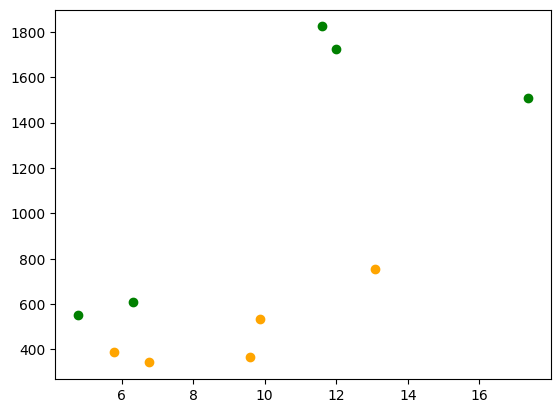

In [10]:
plt.scatter(highestForestLanduse["alpha"], highestForestLanduse["c_s"], c="green")
plt.scatter(highestAgricultureLanduse["alpha"], highestAgricultureLanduse["c_s"], c="orange")

In [51]:
print(catchments[catchments["forests"] > 0.7]["R2"].mean(), catchments[catchments["forests"] > 0.7]["R2"].count())
print(catchments[catchments["agriculture"] > 0.7]["R2"].mean(), catchments[catchments["agriculture"] > 0.7]["R2"].count())

0.6819161592996139 16
0.7790386715296378 19


In [124]:
catchments[catchments["station"] == "BENTFELD"][["c_s", "alpha", "iota", "theta", "c_m", "beta", "gamma", "ndvi_w", "temp_w"]]

,c_s,alpha,iota,theta,c_m,beta,gamma,ndvi_w,temp_w
14,686.601562,14.381104,10.898438,9.960938,2.465332,0.876563,0.204346,0.46225,0.773438


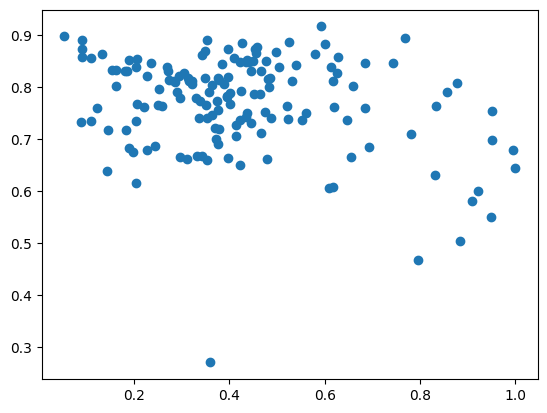

In [25]:
plt.scatter(catchments["forests"], catchments["R2"])

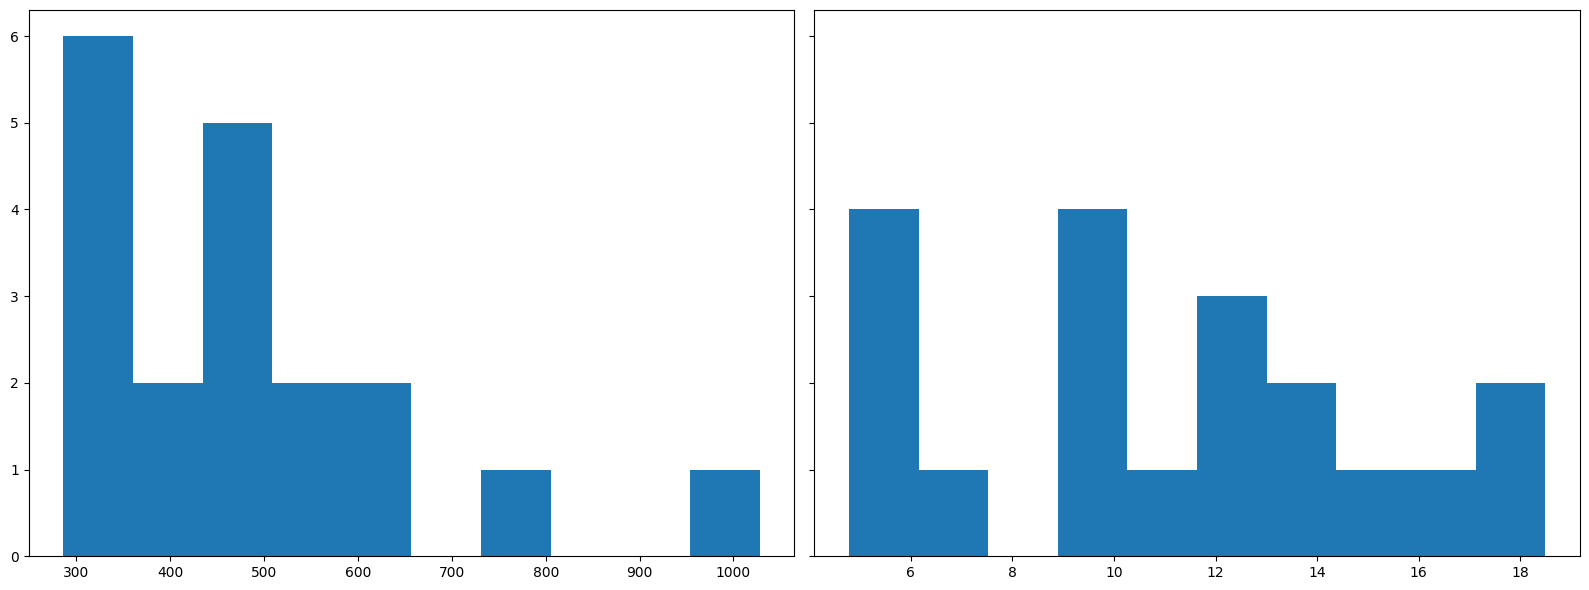

In [54]:
highAgri = catchments[catchments["agriculture"] > 0.7]
highForest = catchments[catchments["forests"] > 0.7]

fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

axes[0].hist(highAgri["c_s"])
axes[1].hist(highAgri["alpha"])

plt.tight_layout()
plt.show()

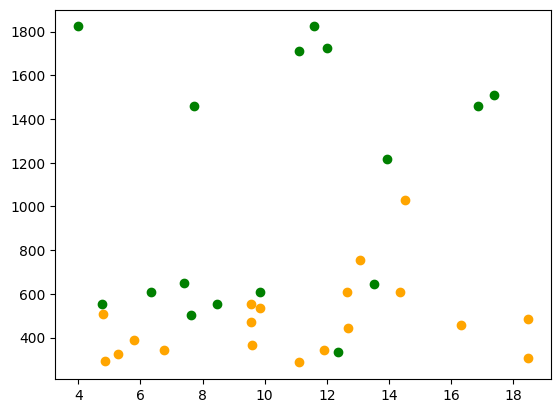

In [56]:

plt.scatter(highAgri["alpha"], highAgri["c_s"], c="orange")
plt.scatter(highForest["alpha"], highForest["c_s"], c="green")
plt.show()

In [119]:
conditions = [
    catchments["forests"] > 0.7,
    catchments["agriculture"] > 0.8
]
choices = ["forest", "agriculture"]
catchments["landuse"] = np.select(conditions, choices, default="mixed")

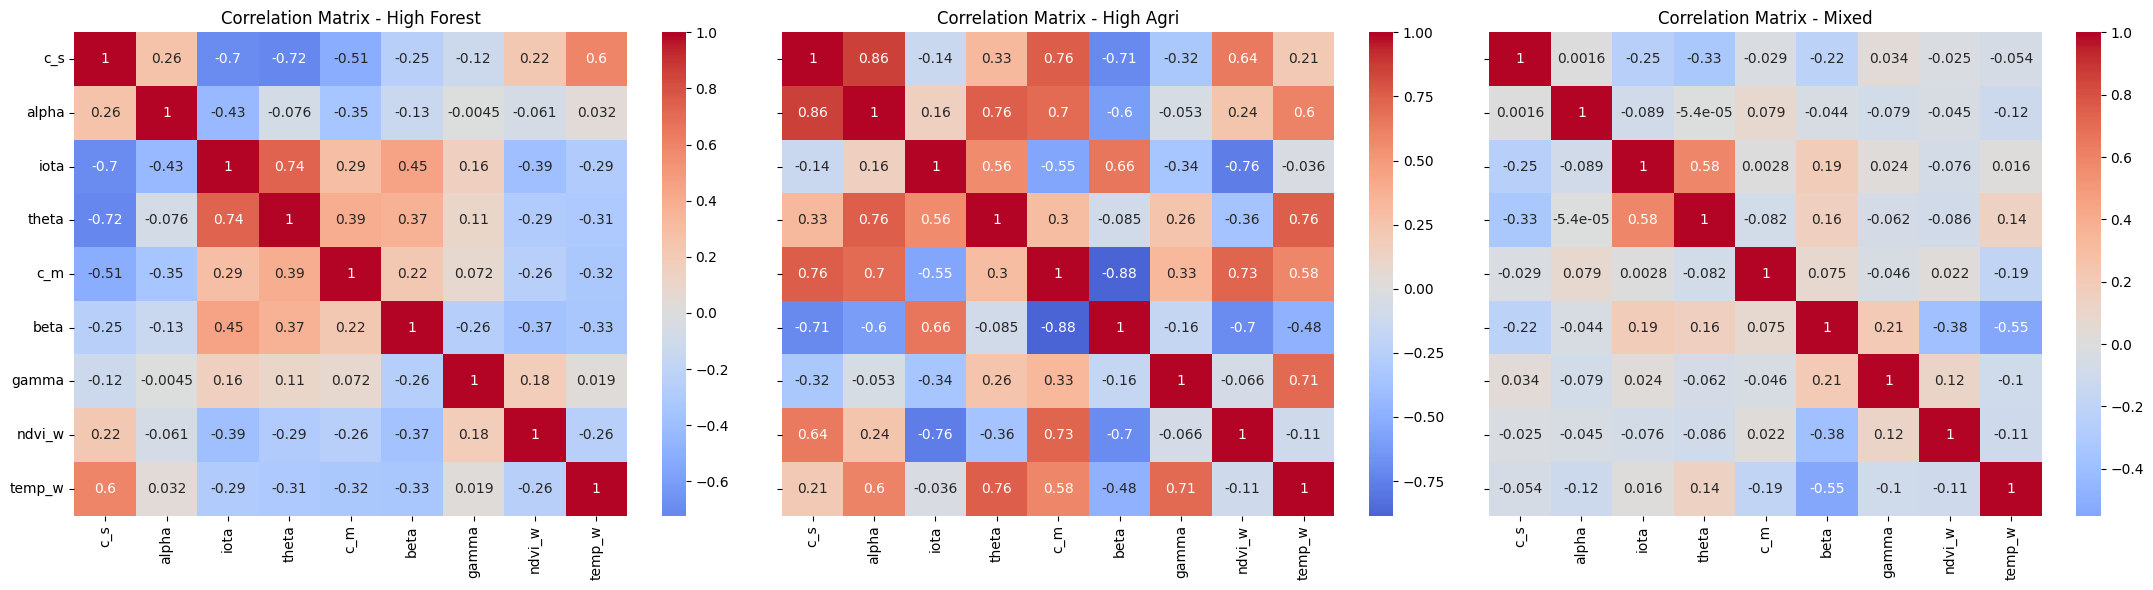

In [120]:
highAgri = catchments[catchments["landuse"] == "agriculture"]
highForest = catchments[catchments["landuse"] == "forest"]
mixed = catchments[catchments["landuse"] == "mixed"]

dfCorr_forest = highForest[["c_s", "alpha", "iota", "theta", "c_m", "beta", "gamma", "ndvi_w", "temp_w"]]
dfCorr_agri = highAgri[["c_s", "alpha", "iota", "theta", "c_m", "beta", "gamma", "ndvi_w", "temp_w"]]
dfCorr_mixed = mixed[["c_s", "alpha", "iota", "theta", "c_m", "beta", "gamma", "ndvi_w", "temp_w"]]

# Calculate correlation matrices
corr_forest = dfCorr_forest.corr()
corr_agri = dfCorr_agri.corr()
corr_mixed = dfCorr_mixed.corr()

# Plot side-by-side
fig, axes = plt.subplots(1, 3, figsize=(22, 6), sharey=True)

sns.heatmap(corr_forest, annot=True, cmap='coolwarm', center=0, ax=axes[0])
axes[0].set_title("Correlation Matrix - High Forest")

sns.heatmap(corr_agri, annot=True, cmap='coolwarm', center=0, ax=axes[1])
axes[1].set_title("Correlation Matrix - High Agri")

sns.heatmap(corr_mixed, annot=True, cmap='coolwarm', center=0, ax=axes[2])
axes[2].set_title("Correlation Matrix - Mixed")

plt.tight_layout()
plt.show()

In [121]:
highAgri

,grdc_no,river,station,area,altitude,lat_org,long_org,lat_pp,long_pp,dist_km,...,iota,theta,R2,agriculture,forests,infrastructure,wetlands,water,geometry,landuse
2,6334270.0,SOHOLMER AU,SOHOLM,352.00,1.70,54.6997,9.0228,54.70000,9.02250,0.0,...,5.789795,10.272217,0.872571,0.851289,0.089576,0.050544,0.007115,0.001477,"MULTIPOLYGON (((8.9671 54.6754, 8.9671 54.6754...",agriculture
3,6334800.0,TREENE,TREIA,481.00,5.00,54.5143,9.3173,54.51417,9.31750,0.0,...,12.109375,9.244995,0.898128,0.887285,0.053316,0.048163,0.005606,0.005630,"MULTIPOLYGON (((9.4962 54.5737, 9.4971 54.5737...",agriculture
112,6341100.0,LOITER AU,WESTERAKEBY,203.99,-999.00,54.5871,9.6845,54.58750,9.68417,0.0,...,9.244995,11.206055,0.889768,0.865069,0.090781,0.032083,0.003327,0.008740,"MULTIPOLYGON (((9.6396 54.6804, 9.6396 54.6812...",agriculture
114,6341250.0,STEPENITZ,BOERZOW,441.00,-999.00,53.8557,11.1175,53.85583,11.11750,0.0,...,9.244995,8.443451,0.732196,0.869405,0.089244,0.035022,0.000000,0.006329,"MULTIPOLYGON (((11.1096 53.8521, 11.1096 53.85...",agriculture
130,6342660.0,STROGEN,APPOLDING,141.80,424.24,48.4136,11.9794,48.41417,11.97833,0.1,...,3.831482,4.622498,0.759899,0.823558,0.121052,0.054622,0.000000,0.000768,"MULTIPOLYGON (((11.9829 48.4146, 11.9854 48.41...",agriculture


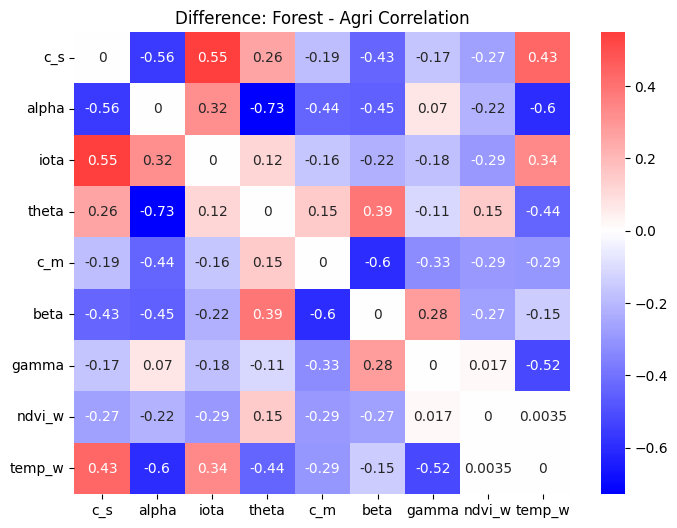

In [48]:
corr_diff = np.abs(corr_forest) - np.abs(corr_agri)

plt.figure(figsize=(8, 6))
sns.heatmap(corr_diff, annot=True, cmap='bwr', center=0)
plt.title("Difference: Forest - Agri Correlation")
plt.show()

In [ ]:
param_cols = ["c_s", "alpha", "iota", "theta", "c_m", "beta", "gamma", "ndvi_w", "temp_w"]

def flatten_corr_matrix(df):
    corr = df[param_cols].corr()
    return corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool)).stack()

features = []
labels = []

grouped = catchments[catchments["landuse"].isin(["forest", "agriculture"])].groupby("station")
for catchment_id, group in grouped:
    if len(group) < 10:  # skip too-small catchments
        continue
    corr_vector = flatten_corr_matrix(group)
    if corr_vector.isnull().any():  # skip incomplete ones
        continue
    features.append(corr_vector)
    labels.append(group["landuse"].iloc[0])

X = pd.DataFrame(features)
y = pd.Series(labels)

In [69]:
import itertools
param_cols = ["c_s", "alpha", "iota", "theta", "c_m", "beta"]
df = catchments.copy()  # your dataframe with one row per catchment

# Create interaction features (products)
for a, b in itertools.combinations(param_cols, 2):
    df[f"{a}_x_{b}"] = df[a] * df[b]

# Now your features are the original params + their pairwise products
feature_cols = param_cols + [f"{a}_x_{b}" for a, b in itertools.combinations(param_cols, 2)]

# Train ML model using these features:
X = df[feature_cols]
y = df["landuse"]
y

0            mixed
1            mixed
2      agriculture
3      agriculture
4            mixed
          ...     
147         forest
148         forest
149          mixed
150          mixed
151    agriculture
Name: landuse, Length: 152, dtype: object

In [72]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from sklearn.model_selection import cross_val_score, StratifiedKFold

from sklearn.utils import resample
from sklearn.metrics import f1_score
import numpy as np

n_iterations = 1000
f1_scores = []

for i in range(n_iterations):
    # Bootstrap sample from training data
    X_resampled, y_resampled = resample(X, y, stratify=y, random_state=i)
    
    clf = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
    clf.fit(X_resampled, y_resampled)
    
    # Evaluate on out-of-bag samples (those NOT in bootstrap sample)
    oob_mask = ~X.index.isin(X_resampled.index)
    if oob_mask.sum() == 0:
        continue  # rare case, skip
    
    X_oob = X.loc[oob_mask]
    y_oob = y.loc[oob_mask]
    
    y_pred = clf.predict(X_oob)
    score = f1_score(y_oob, y_pred, average='macro')
    f1_scores.append(score)

print(f"Bootstrap F1-score mean: {np.mean(f1_scores):.3f} ± {np.std(f1_scores):.3f}")

Bootstrap F1-score mean: 0.446 ± 0.077


In [91]:
params = ["c_s", "alpha", "iota", "theta", "c_m", "beta", "gamma", "ndvi_w", "temp_w"]

# Compute mean vector and covariance matrix for each land use type
class_stats = {}
for lu in df["landuse"].unique():
    df_lu = df[df["landuse"] == lu][params]
    mean_vec = df_lu.mean().values
    cov_mat = df_lu.cov().values  # covariance matrix
    class_stats[lu] = {"mean": mean_vec, "cov": cov_mat}

In [92]:
from scipy.spatial.distance import mahalanobis
from numpy.linalg import inv

def mahalanobis_distance(x, mean_vec, cov_mat):
    cov_inv = inv(cov_mat)
    dist = mahalanobis(x, mean_vec, cov_inv)
    return dist

In [94]:
catchments

,grdc_no,river,station,area,altitude,lat_org,long_org,lat_pp,long_pp,dist_km,...,iota,theta,R2,agriculture,forests,infrastructure,wetlands,water,geometry,landuse
0,6321100.0,NIERS,GOCH,1203.0,12.02,51.6840,6.1510,51.68417,6.15083,0.0,...,4.503174,4.229736,0.856343,0.685409,0.090451,0.217199,0.000000,0.006941,"MULTIPOLYGON (((6.2588 51.7171, 6.2588 51.7179...",mixed
1,6321200.0,ROER,STAH,2105.0,32.45,51.0976,6.1042,51.09750,6.10417,0.0,...,6.797791,8.988190,0.667515,0.473625,0.331916,0.182036,0.004035,0.008389,"MULTIPOLYGON (((6.0396 50.7721, 6.0388 50.7721...",mixed
2,6334270.0,SOHOLMER AU,SOHOLM,352.0,1.70,54.6997,9.0228,54.70000,9.02250,0.0,...,5.789795,10.272217,0.872571,0.851289,0.089576,0.050544,0.007115,0.001477,"MULTIPOLYGON (((8.9671 54.6754, 8.9671 54.6754...",agriculture
3,6334800.0,TREENE,TREIA,481.0,5.00,54.5143,9.3173,54.51417,9.31750,0.0,...,12.109375,9.244995,0.898128,0.887285,0.053316,0.048163,0.005606,0.005630,"MULTIPOLYGON (((9.4962 54.5737, 9.4971 54.5737...",agriculture
4,6335030.0,RUHR,HATTINGEN,4078.0,64.69,51.3997,7.1610,51.40000,7.16167,0.1,...,12.326660,11.556244,0.885977,0.327740,0.525959,0.138389,0.000000,0.007912,"MULTIPOLYGON (((7.1887 51.3912, 7.1887 51.3921...",mixed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,6343555.0,RAMSAUER ACHE,ILSANK,122.3,576.16,47.6200,12.9500,47.61417,12.95000,0.6,...,2.980042,1.915741,0.548707,0.045532,0.949646,0.004821,0.000000,0.000000,"MULTIPOLYGON (((12.9196 47.6279, 12.9196 47.62...",forest
148,6343560.0,SAALACH,UNTERJETTENBERG,940.6,494.40,47.6812,12.8228,47.68120,12.82290,0.0,...,3.383789,1.797638,0.631270,0.118743,0.831301,0.047921,0.001439,0.000596,"MULTIPOLYGON (((12.7875 47.7542, 12.8125 47.75...",forest
149,6357501.0,LUSATIAN NEISSE RIVER,GUBEN 2,4080.0,37.48,51.9692,14.7069,51.96917,14.70750,0.0,...,10.217285,8.217773,0.739908,0.420282,0.487747,0.084647,0.000890,0.006435,"MULTIPOLYGON (((14.7154 51.9513, 14.7146 51.95...",mixed
150,6357502.0,LUSATIAN NEISSE RIVER,GOERLITZ,1621.0,175.63,51.1612,14.9932,51.16040,14.99380,0.1,...,7.250977,10.546875,0.740343,0.521159,0.335491,0.135507,0.000266,0.007577,"MULTIPOLYGON (((14.9667 51.175, 14.975 51.175,...",mixed


In [106]:
x = catchments.iloc[6][params].values
distances = {}
for lu, stats in class_stats.items():
    dist = mahalanobis_distance(x, stats["mean"], stats["cov"])
    distances[lu] = dist

# Find land use with minimum distance
predicted_landuse = min(distances, key=distances.get)

print("Distances:", distances)
print("Predicted land use:", predicted_landuse)

Distances: {'mixed': np.float64(2.2167819646728315), 'agriculture': np.float64(3.320222055621271), 'forest': np.float64(5.242086353051835)}
Predicted land use: mixed


In [107]:
catchments.iloc[6]

grdc_no                                                   6335032.0
river                                                          RUHR
station                                                    MESCHEDE
area                                                          425.0
altitude                                                      265.3
lat_org                                                     51.3478
long_org                                                     8.2806
lat_pp                                                     51.34792
long_pp                                                     8.28042
dist_km                                                         0.0
area_calc                                                     426.5
quality                                                        High
type                                                      Automatic
comment                  Area difference <= 5% and distance <= 5 km
source                                          